<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Define-Mapping-Dictionaries" data-toc-modified-id="Define-Mapping-Dictionaries-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Define Mapping Dictionaries</a></span></li><li><span><a href="#Define-the-Import-Function" data-toc-modified-id="Define-the-Import-Function-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Define the Import Function</a></span></li><li><span><a href="#Confirm-the-imported-data" data-toc-modified-id="Confirm-the-imported-data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Confirm the imported data</a></span></li></ul></li></ul></li><li><span><a href="#Distribution-of-Names" data-toc-modified-id="Distribution-of-Names-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribution of Names</a></span><ul class="toc-item"><li><span><a href="#Baby-Names-and-the-Power-Law-Distribution" data-toc-modified-id="Baby-Names-and-the-Power-Law-Distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Baby Names and the <span style="color:#ff6347">Power Law Distribution</span></a></span></li></ul></li><li><span><a href="#US-Birth-Rate-Analysis" data-toc-modified-id="US-Birth-Rate-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>US Birth Rate Analysis</a></span><ul class="toc-item"><li><span><a href="#Overall-Birth-Trend" data-toc-modified-id="Overall-Birth-Trend-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overall Birth Trend</a></span></li><li><span><a href="#States-Ranking" data-toc-modified-id="States-Ranking-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>States Ranking</a></span></li><li><span><a href="#Birth-Rate-flactuations-Throughout-the-Years" data-toc-modified-id="Birth-Rate-flactuations-Throughout-the-Years-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Birth Rate flactuations Throughout the Years</a></span><ul class="toc-item"><li><span><a href="#Top-5" data-toc-modified-id="Top-5-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Top 5</a></span></li><li><span><a href="#All-Rankings-Birds-Eye-View" data-toc-modified-id="All-Rankings-Birds-Eye-View-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>All Rankings Birds-Eye View</a></span></li></ul></li><li><span><a href="#Overall-Top-5-States-with-highest-Births" data-toc-modified-id="Overall-Top-5-States-with-highest-Births-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Overall Top 5 States with highest Births</a></span></li></ul></li><li><span><a href="#US-Baby-Names-Analysis" data-toc-modified-id="US-Baby-Names-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>US Baby Names Analysis</a></span></li></ul></div>

# Preprocessing

## Import Packages

In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from matplotlib.patheffects import withStroke
from matplotlib import lines, patches
import matplotlib.patheffects as path_effects

## Import Data

### Define Mapping Dictionaries

In [2]:
state_dict = {
    'AL': 'Alabama','AK': 'Alaska','AZ': 'Arizona','AR': 'Arkansas',
    'CA': 'California','CO': 'Colorado','CT': 'Connecticut','DE': 'Delaware',
    'FL': 'Florida','GA': 'Georgia','HI': 'Hawaii','ID': 'Idaho',
    'IL': 'Illinois','IN': 'Indiana','IA': 'Iowa','KS': 'Kansas',
    'KY': 'Kentucky','LA': 'Louisiana','ME': 'Maine','MD': 'Maryland',
    'MA': 'Massachusetts','MI': 'Michigan','MN': 'Minnesota','MS': 'Mississippi',
    'MO': 'Missouri','MT': 'Montana','NE': 'Nebraska','NV': 'Nevada',
    'NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NY': 'New York',
    'NC': 'North Carolina','ND': 'North Dakota','OH': 'Ohio','OK': 'Oklahoma',
    'OR': 'Oregon','PA': 'Pennsylvania','RI': 'Rhode Island','SC': 'South Carolina',
    'SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah',
    'VT': 'Vermont','VA': 'Virginia','WA': 'Washington','WV': 'West Virginia',
    'WI': 'Wisconsin','WY': 'Wyoming', "DC": "Columbia"
}

### Define the Import Function

In [3]:
# Read all text files into a single table

def get_data(zip_path):
    with zipfile.ZipFile(zip_path) as zf:
        return  (pd.concat(
                    [pd.read_csv(zf.open(f),
                                 header=None, 
                                 names=['State', 'Gender', 'Year', 'Name', 'Births'])
                     for f in zf.namelist() if f.endswith("TXT")],
                ignore_index=True)
                 .assign(Year = lambda _df : pd.to_datetime(_df.Year,format="%Y")+ pd.offsets.YearEnd(0),
                        State = lambda _df: _df.State.map(state_dict)))

### Confirm the imported data

In [4]:
# Get data from the source folder
zip_path = 'Data/namesbystate.zip'
df = get_data(zip_path)

# Check null values
print(f'Total null values are {df.isna().sum().sum()}')

# Display the first 5 enteries
df

Total null values are 0


,State,Gender,Year,Name,Births
0,Alaska,F,1910-12-31,Mary,14
1,Alaska,F,1910-12-31,Annie,12
2,Alaska,F,1910-12-31,Anna,10
3,Alaska,F,1910-12-31,Margaret,8
4,Alaska,F,1910-12-31,Helen,7
...,...,...,...,...,...
6408036,Wyoming,M,2022-12-31,Lane,5
6408037,Wyoming,M,2022-12-31,Michael,5
6408038,Wyoming,M,2022-12-31,Nicholas,5
6408039,Wyoming,M,2022-12-31,River,5


# Distribution of Names

at first glance it can be shown that the distribution is highly skewed an uneven.

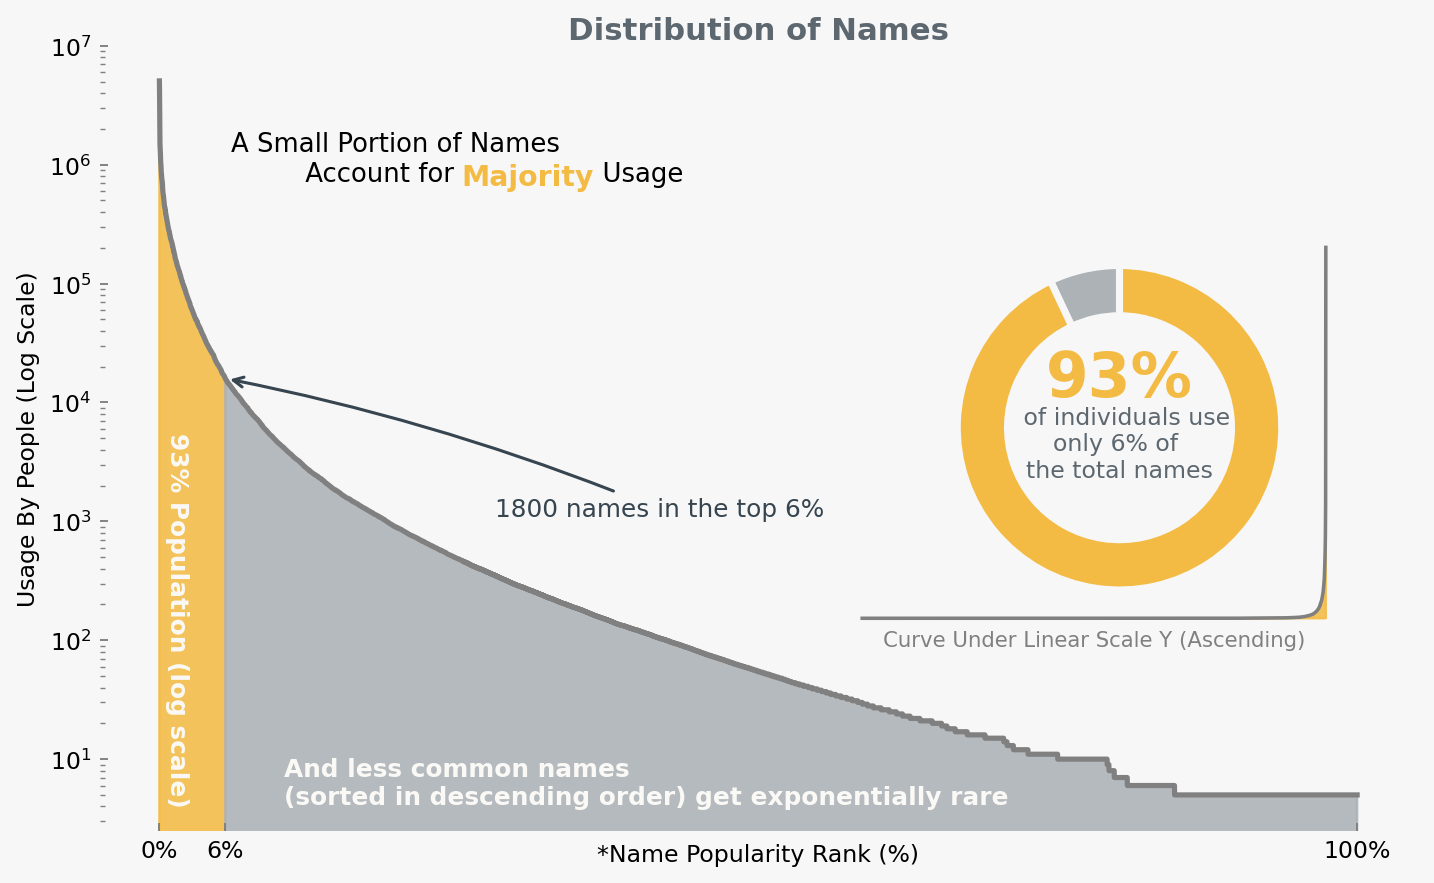

In [5]:
def transform_data(df):
    return df.groupby("Name").Births.sum().sort_values(ascending=False)

def plot_line(ax, data, topN, names, accent_color):
    ax.set_facecolor('none')
    data.plot.line(ax=ax,lw=2.2,color='grey', ylabel='Usage By People (Log Scale)')
    ax.set_xlabel("*Name Popularity Rank (%)", labelpad=-8)
    line_data = ax.lines[0].get_data()
    ax.set_xticks([0,topN,line_data[0][-1]],["0%",f'{names}%',"100%"])
    ax.set_yscale("log")
    ax.tick_params(axis='both',which='both', color='grey',direction='in')
    sns.despine(left=True,bottom=True,ax=ax)
    ax.fill_between(line_data[0],line_data[1],where=(line_data[0]<=topN),alpha=0.88,color=accent_color)
    ax.fill_between(line_data[0],line_data[1],where=(line_data[0]>topN),alpha=0.88,color="#ACB2B6")

def plot_pie(ax, ppl, accent_color):
    sizes = [100 - ppl, ppl]
    colors = ['#ACB2B6', accent_color]
    ax.pie(sizes, colors=colors, startangle=90, wedgeprops={"edgecolor": "#F7F7F7", 'linewidth': 3, "width": 0.31})
    ax.axis('equal')

def plot_small_line(ax, data, line_data, topN, accent_color):
    sns.lineplot(data=data, x=line_data[0], y=line_data[1], ax=ax, color='grey')
    ax.set(yticks=[], xticks=[])
    ax.set_xlabel("Curve Under Linear Scale Y (Ascending)", size=9, labelpad=-3, color="grey")
    sns.despine(ax=ax, left=True, bottom=True)
    ax.fill_between(line_data[0], line_data[1], alpha=0.88, color=np.where(line_data[0] <= topN, accent_color, "#ACB2B6"))
    ax.invert_xaxis()
    
def annotate_plots(ax, ax2, ax3, topN, names, ppl,line_data,accent_color,title):
    subtitle = "A Small Portion of Names\n         Account for                  Usage"
    ax.set_title(title, fontsize=13, fontweight='bold',pad=0,color='#5D676F')
    ax.text(0.1, 0.855, subtitle, fontsize=11, fontweight='normal',
            ha='left', va='center', transform=ax.transAxes)
    ax.text(0.275, 0.85, "Majority", fontsize=12, fontweight='bold',
            ha='left', va='top', transform=ax.transAxes, color=accent_color)
    ax.text(0.14, 0.06, "And less common names\n(sorted in descending order) get exponentially rare",
            fontsize=10.5, fontweight='bold',
            ha='left', va='center', transform=ax.transAxes, color='#FAF9F6')
    ax.text(0.05, 0.03, f"{ppl}% Population (log scale)", fontsize=10.5, fontweight='bold',
            ha='left', va='bottom', transform=ax.transAxes, color='#FAF9F6',rotation=-90)

    ax2.text(0,0.3,f"{ppl}%",ha='center',va='center',size=26,weight='bold',color=accent_color)
    ax2.text(0,-0.1,f"   of individuals use \nonly {names}% of \nthe total names",
             ha='center',va='center',size=10,color='#5D676F')


    ;

    ax.annotate(f'{topN} names in the top {names}%',
                xy=(topN,line_data[1][topN]), xycoords='data', size=10.5,color ="#36454F",
                xytext=(0.3,0.4), textcoords='axes fraction', ha='left',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.05",lw=1.3,color ="#36454F"));
    
def create_plot(df, topN=1800, accent_color='#F4BB44',title="Distribution of Names"):
    data = transform_data(df)
    names = int(round((topN/len(data)),2)*100)
    ppl = int((data.nlargest(topN).sum()/data.sum()).round(2)*100)
    
    # Canvas
    fig, ax = plt.subplots(figsize=(10, 6),facecolor='#F7F7F7',dpi=170)
    plot_line(ax, data, topN, names, accent_color)  
    ax2 = fig.add_axes([0.55, 0.33, 0.35, 0.35])
    plot_pie(ax2, ppl, accent_color)
    ax3 = fig.add_axes([0.56, 0.3, 0.3, 0.4],facecolor='none')
    plot_small_line(ax3, data, ax.lines[0].get_data(), topN, accent_color)
    annotate_plots(ax, ax2, ax3, topN, names, ppl,ax.lines[0].get_data(), accent_color, title)
    
create_plot(df,1800)

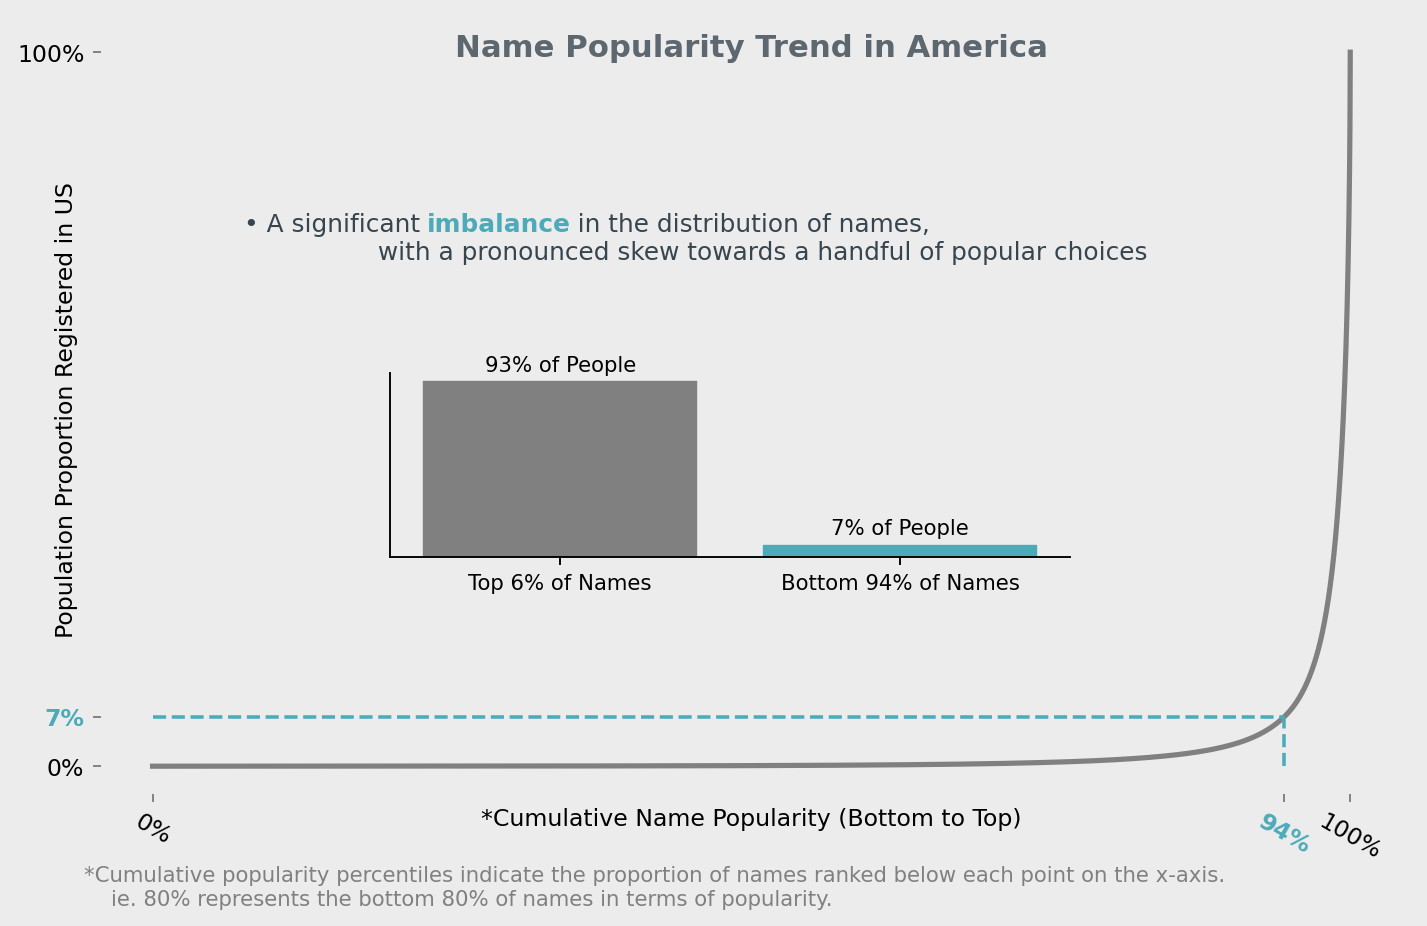

In [6]:
def transform_data(df):
    return df.groupby("Name").Births.sum().sort_values(ascending=False)

def plot_line(ax, data, topN, names,ppl, accent_color):
# Line Plot
    ax.set_facecolor('none')
    sns.despine(left=True,bottom=True,ax=ax)
    data.sort_values().cumsum().plot(color='grey',ax=ax,lw=2.2)
    ax.set_xlabel("*Cumulative Name Popularity (Bottom to Top)",labelpad=-24)
    ax.set_ylabel("Population Proportion Registered in US",labelpad=-26)
    plt.setp([ax.get_xticklabels()[1],ax.get_yticklabels()[1]], color=accent_color,weight='bold')
    x,y = ax.lines[0].get_data()
    bottom_ppl = x[-1]-topN
    ax.set_xticks([x[0],bottom_ppl,x[-1]],['0%',f'{100-names}%',"100%"],rotation=-30)
    ax.set_yticks([y[0],y[bottom_ppl],y[-1]],['0%',f'{100-ppl}%',"100%"])
    ax.hlines(y[bottom_ppl],xmin=0,xmax=bottom_ppl,ls='dashed',color=accent_color)
    ax.vlines(bottom_ppl,ymin=0,ymax=y[bottom_ppl],ls='dashed',color=accent_color)
    ax.tick_params(axis='both',direction='in',color="grey")
    
def plot_barplot(ax, data, names, ppl,accent_color):
    ax.set(xticks=[], yticks=[])
    plt.tick_params(axis='x', labelsize=9)
    TopNames = (1 - (100 - names) / 100)
    top = data.nlargest(int(len(data) * TopNames))
    bottom = data.nsmallest(len(data) - int(len(data) * TopNames))
    df2 = pd.Series([(top.sum() / data.sum()) * 100, (bottom.sum() / data.sum()) * 100],
                    [f"Top {names}% of Names", f"Bottom {100 - names}% of Names"])
    sns.despine(ax=ax)
    sns.barplot(pd.DataFrame(df2).T, ax=ax)
    
    for i, patch in enumerate(ax.patches):
        x = patch.get_x() + (patch.get_width() / 2)
        y = patch.get_height()
        t = f"{ppl}% of People" if i == 0 else f"{100 - ppl}% of People"
        color = "grey" if i == 0 else accent_color
        ax.text(x, y + 6, t, ha='center',size=9)
        patch.set_color(color)

def annotate_plots(ax, title,accent_color):
    ax.text(2.5e3, 2.5e8, "• A significant                    in the distribution of names,\n     "\
            "            with a pronounced skew towards a handful of popular choices",
            fontsize=10.5, ha='left', va='top', color="#36454F")

    ax.text(7.5e3, 2.5e8, "imbalance", fontsize=10.5, ha='left', va='top', color=accent_color, weight='bold')

    ax.text(0.5, 0.96, title, size=13, weight='bold', color="#5D676F",
        ha='center', va='center', transform=ax.transAxes)

    note = """*Cumulative popularity percentiles indicate the proportion of names ranked below each point on the x-axis.
    ie. 80% represents the bottom 80% of names in terms of popularity."""
    ax.text(0.12, 0.005, note, transform=ax.figure.transFigure, ha='left', va='bottom', fontsize=9, color='grey')



def create_plot(df,accent_color = "#4DAAB9",title="Name Popularity Trend in America"):
    data = transform_data(df)
    topN=1800
    names = int(round((topN/len(data)),2)*100)
    ppl = int((data.nlargest(topN).sum()/data.sum()).round(2)*100)
    
    fig, ax = plt.subplots(figsize=(10, 6), facecolor="#ECECEC",dpi=170)
    plot_line(ax, data, topN, names, ppl, accent_color)
    
    ax2 = fig.add_axes([0.3, 0.35, 0.4, 0.18], facecolor='none')
    plot_barplot(ax2, data, names, ppl,accent_color)
    annotate_plots(ax,title,accent_color)
    return fig
    
    
create_plot(df);

## Baby Names and the <span style="color: #ff6347;">Power Law Distribution</span>
Drafts <br>
The power law distribution is a function of the form $f(x) \sim x^{-\alpha}$, where $x$ is the variable and $\alpha$ is the scaling parameter.

Baby names and power law distribution are closely related. Power law distribution is a statistical distribution where the frequency of an event is inversely proportional to its magnitude. In the context of baby names, this means that a few names occur very frequently, while the majority of names occur infrequently.

This pattern is known as the <span style="color: #ad2141;"> <b >Matthew effect"</b></span>, where the popular names become even more popular over time, while the less popular names continue to decline in popularity. This effect is driven by social influence and cultural trends, which can amplify the initial differences in popularity between names.

----
<li>To confirm the power-law hypothesis we need to compare the <em>probability denstiy functions (PDF)</em> <br/><br/>
The PDF of a real-world dataset is usually not known beforehand, so we need to estimate it from the data.One way to do this is to calculate the empirical PDF, which estimates the probability density of the data by counting the number of data points that fall within small intervals or "bins" along the range of the data.
----
Creates 100 logarithmically spaced bins between the minimum and the maximum values of the data. 
This ensures that the bins are equally spaced on a logarithmic scale, which is important for analyzing power law distributions.
    
This formula is derived from the log-likelihood function for a power law distribution, which is given by:
log_likelihood = -n * np.log(alpha) - (1 + alpha) * np.sum(np.log(data / xmin))

where n is the number of observations in the data, alpha is the scaling parameter to be estimated, data is the dataset,
and xmin is the minimum value at which the power law behavior starts.

The formula alpha = 1 + len(data) / np.sum(np.log(data / data.min())) is obtained by setting the derivative
of the log-likelihood function with respect to alpha equal to zero and solving for alpha.

fit the data to a power law distribution

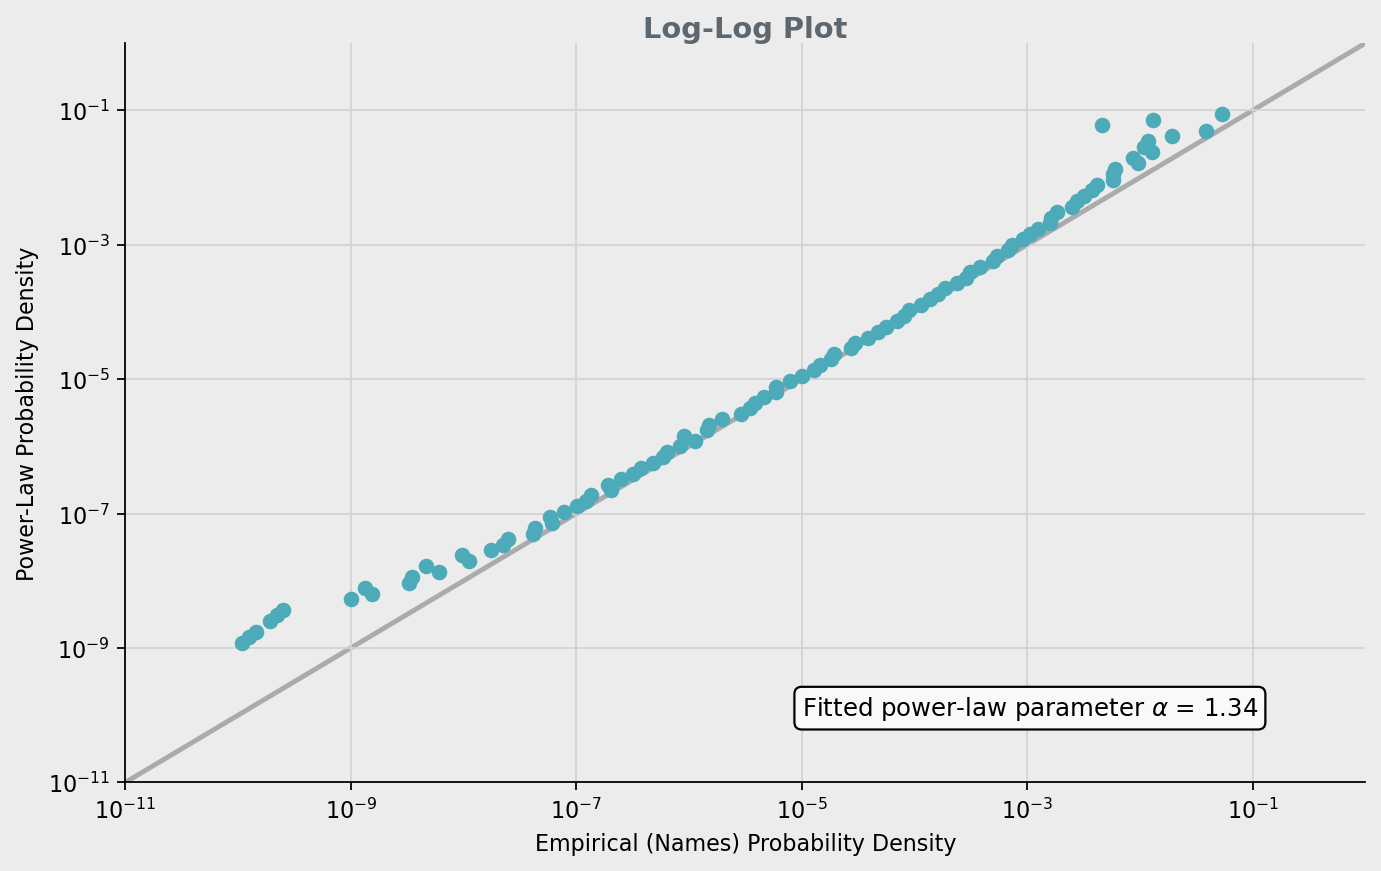

In [7]:
def transform_data(df):
    return df.groupby("Name").Births.sum().sort_values(ascending=False)

def calculate_empirical_pdf(data):
    # Calculate the empirical PDF using the data
    bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 100)
    counts, edges = np.histogram(data, bins=bins, density=True)
    x = (edges[:-1] + edges[1:]) / 2
    return counts, x

def fit_power_law(data,x):
    # Fit the power law distribution to the data
    alpha = 1 + len(data) / np.sum(np.log(data / data.min()))
    y = x ** -alpha
    return alpha, y

def plot_log_log(counts, y, alpha,accent_color):
    fig, ax = plt.subplots(figsize=(10, 6), facecolor="#ECECEC",dpi=160)
    ax.set_title("Log-Log Plot", pad=-10, weight='bold', size=13, color='#5D676F')
    ax.scatter(counts, y, color=accent_color, zorder=2)
    ax.plot([-1, 1], [-1, 1], color='grey', label='45-Degree Line', lw=2.2, zorder=1, alpha=0.6)
    ax.set(xscale="log", yscale="log", xlabel="Empirical (Names) Probability Density",
           ylabel="Power-Law Probability Density", xlim=(1e-11, 1e-0), ylim=(1e-11, 1e-0), facecolor="none")
    sns.despine(ax=ax)
    ax.grid(zorder=0, color="#D3D3D3")
    ax.text(1e-5, 1e-10, rf"Fitted power-law parameter $\alpha$ = {round(alpha,2)}",
            fontsize=11, bbox=dict(facecolor='#f9f9f9', edgecolor='black', boxstyle='round,pad=0.3'))
    return fig

def create_plot(df,accent_color="#4DAAB9"):
    data = transform_data(df)
    counts, x = calculate_empirical_pdf(data)
    alpha, y = fit_power_law(data,x)
    return plot_log_log(counts, y, alpha,accent_color)

create_plot(df);

# US Birth Rate Analysis

## Overall Birth Trend

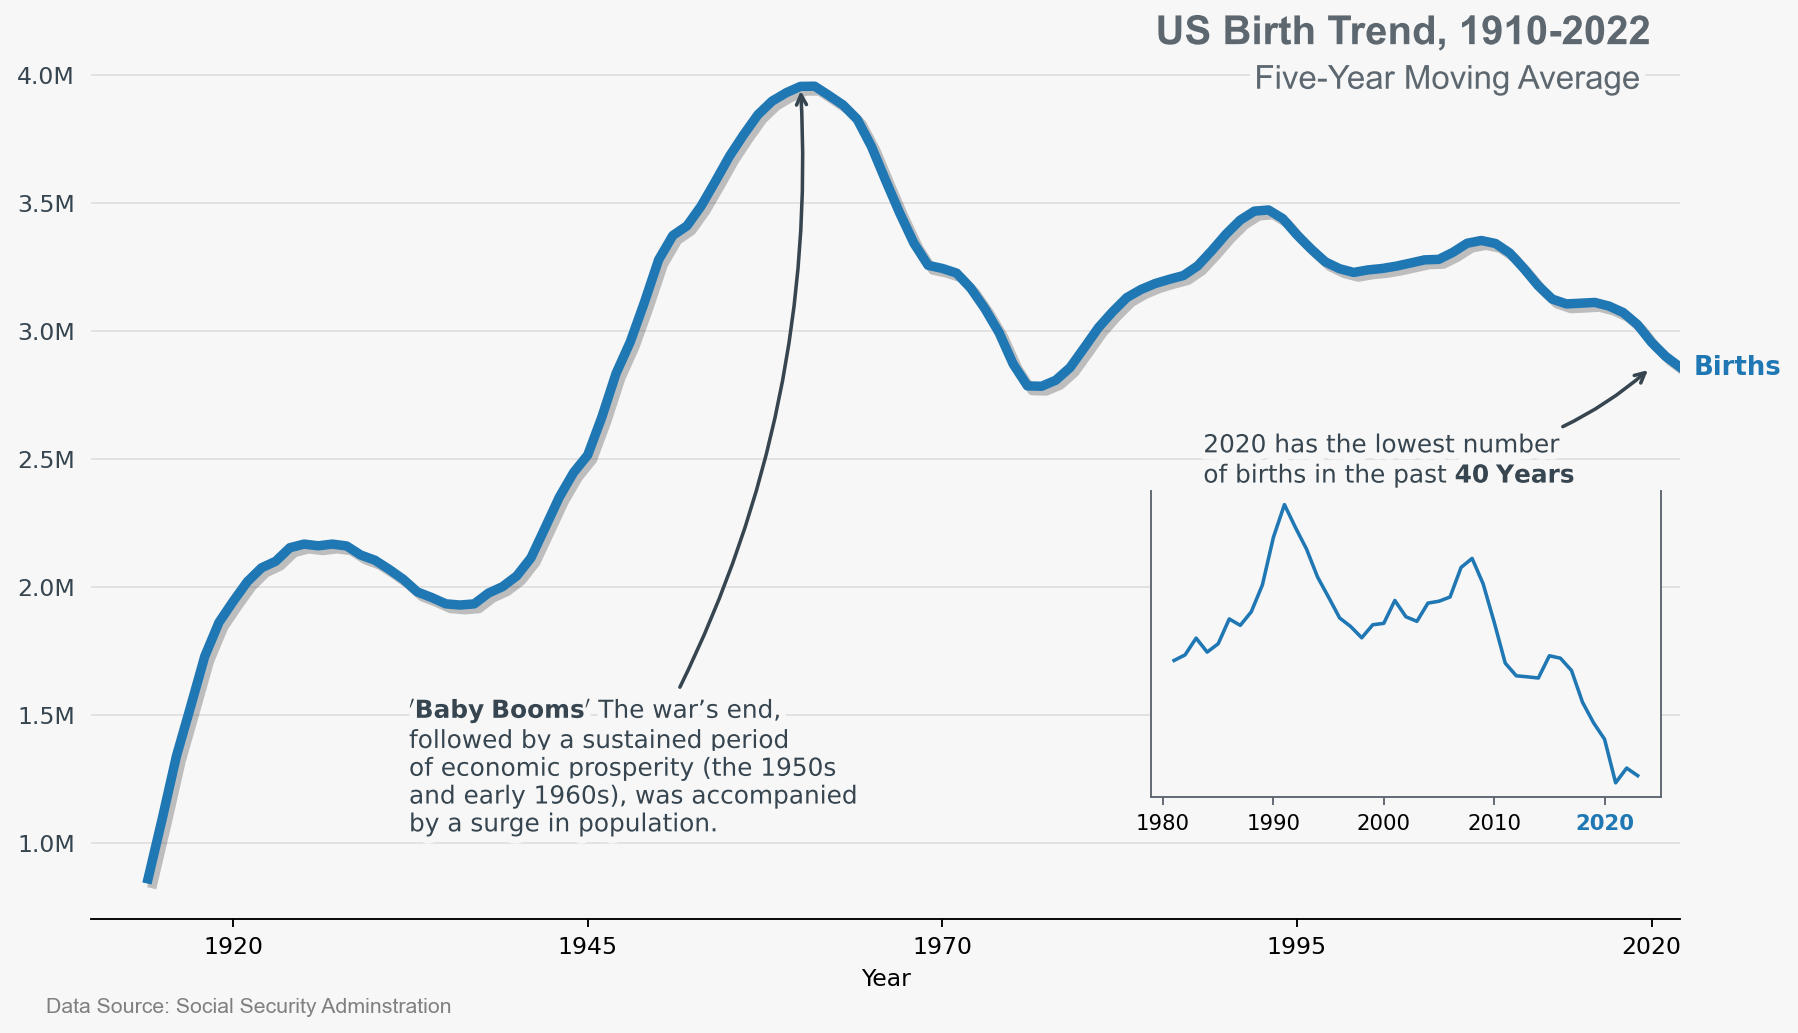

In [8]:
def transform_data(df):
    rolling_mean = df.groupby("Year").sum(numeric_only=True).rolling(5).mean()
    last40_years = df.groupby("Year").sum(numeric_only=True).loc['1980':]
    return rolling_mean, last40_years

def plot_data(rolling_mean):
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='#F7F7F7',dpi=170)
    ax.set_facecolor("none")
    rolling_mean.plot(lw=4, ax=ax,path_effects=[path_effects.SimpleLineShadow(shadow_color='black', linewidth=4,alpha=0.23),path_effects.Normal()])
    sns.despine(left=True, ax=ax)
    ax.legend().remove()
    fig.tight_layout()
    def million_formatter(x, pos):
        return "%.1fM" % (x / 1E6)
    ax.yaxis.set_major_formatter(million_formatter)
    ax.tick_params(which='major', axis="y", width=0, colors="#36454F", labelsize=10)
    ax.tick_params(which='minor', axis="x", width=0, colors="#36454F")
    return fig, ax

def annotate_plot(ax, rolling_mean):
    path_effects = [withStroke(linewidth=6, foreground="#F7F7F7")]
    plt.text(50, rolling_mean.iloc[-1] + 1.3e6, "US Birth Trend, 1910-2022", va="center", size=17, ha="right",fontname="Arial",
             weight='bold', color="#5D676F",path_effects=path_effects)
    plt.text(22, rolling_mean.iloc[-1] + 1.12e6, "Five-Year Moving Average", va="center", size=14,fontname="Arial",
             color="#5D676F",path_effects=path_effects)
    plt.text(53, rolling_mean.iloc[-1], "Births", color="#1f77b4", weight="bold", va="center", size=11)

    
    ax.annotate(r"$\bf{'Baby^ Booms'}$" +
                " The war’s end, \nfollowed by a sustained period \n"\
                "of economic prosperity (the 1950s \nand early 1960s), was accompanied \nby a surge in population.",
                xy=(-10, rolling_mean.max()), xycoords='data', size=10.5, color="#36454F",
                xytext=(0.2, 0.1), textcoords='axes fraction', ha='left',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.15", lw=1.5, color="#36454F"),
                path_effects=path_effects)
    ax.annotate("2020 has the lowest number\n" + r"of births in the past $\bf{40^ Years}$",
                xy=(50, rolling_mean.loc["1980":].min()), xycoords='data', size=10.5, color="#36454F",
                xytext=(0.7, 0.5), textcoords='axes fraction', ha='left',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", lw=1.5, color="#36454F"),
                path_effects=path_effects)
    plt.gcf().text(0.02,0, "Data Source: Social Security Adminstration", transform=ax.figure.transFigure,fontname="Arial",
        ha='left', va='bottom', fontsize=9, color='grey')

    ax.grid(axis="y", color='#D3D3D3', alpha=0.6)
    
def plot_secondary_axes(last40_years, fig):
    ax2= fig.add_axes([0.67,0.215,0.3,0.3])
    sns.lineplot(last40_years, ax=ax2, legend=False)
    ax2.set_xticks(ax2.get_xticks()[1::2], ax2.get_xticklabels()[1::2], size=9)
    ax2.set(ylabel="", xlabel="",yticks=[],facecolor="#F7F7F7")
    ax2.spines["top"].set_visible(False)
    ax2.spines[:].set_color("#5D676F")
    ax2.tick_params(axis="x", color="#5D676F")
    ax2.get_xticklabels()[-1].set_color('#1f77b4')
    ax2.get_xticklabels()[-1].set_weight('bold')
    return fig, ax2

def create_plot(df):
    rolling_mean, last40_years = transform_data(df)
    fig, ax = plot_data(rolling_mean)
    annotate_plot(ax, rolling_mean)
    plot_secondary_axes(last40_years,fig)

    return fig
    
create_plot(df);

## States Ranking
ranking for total birhts each decade

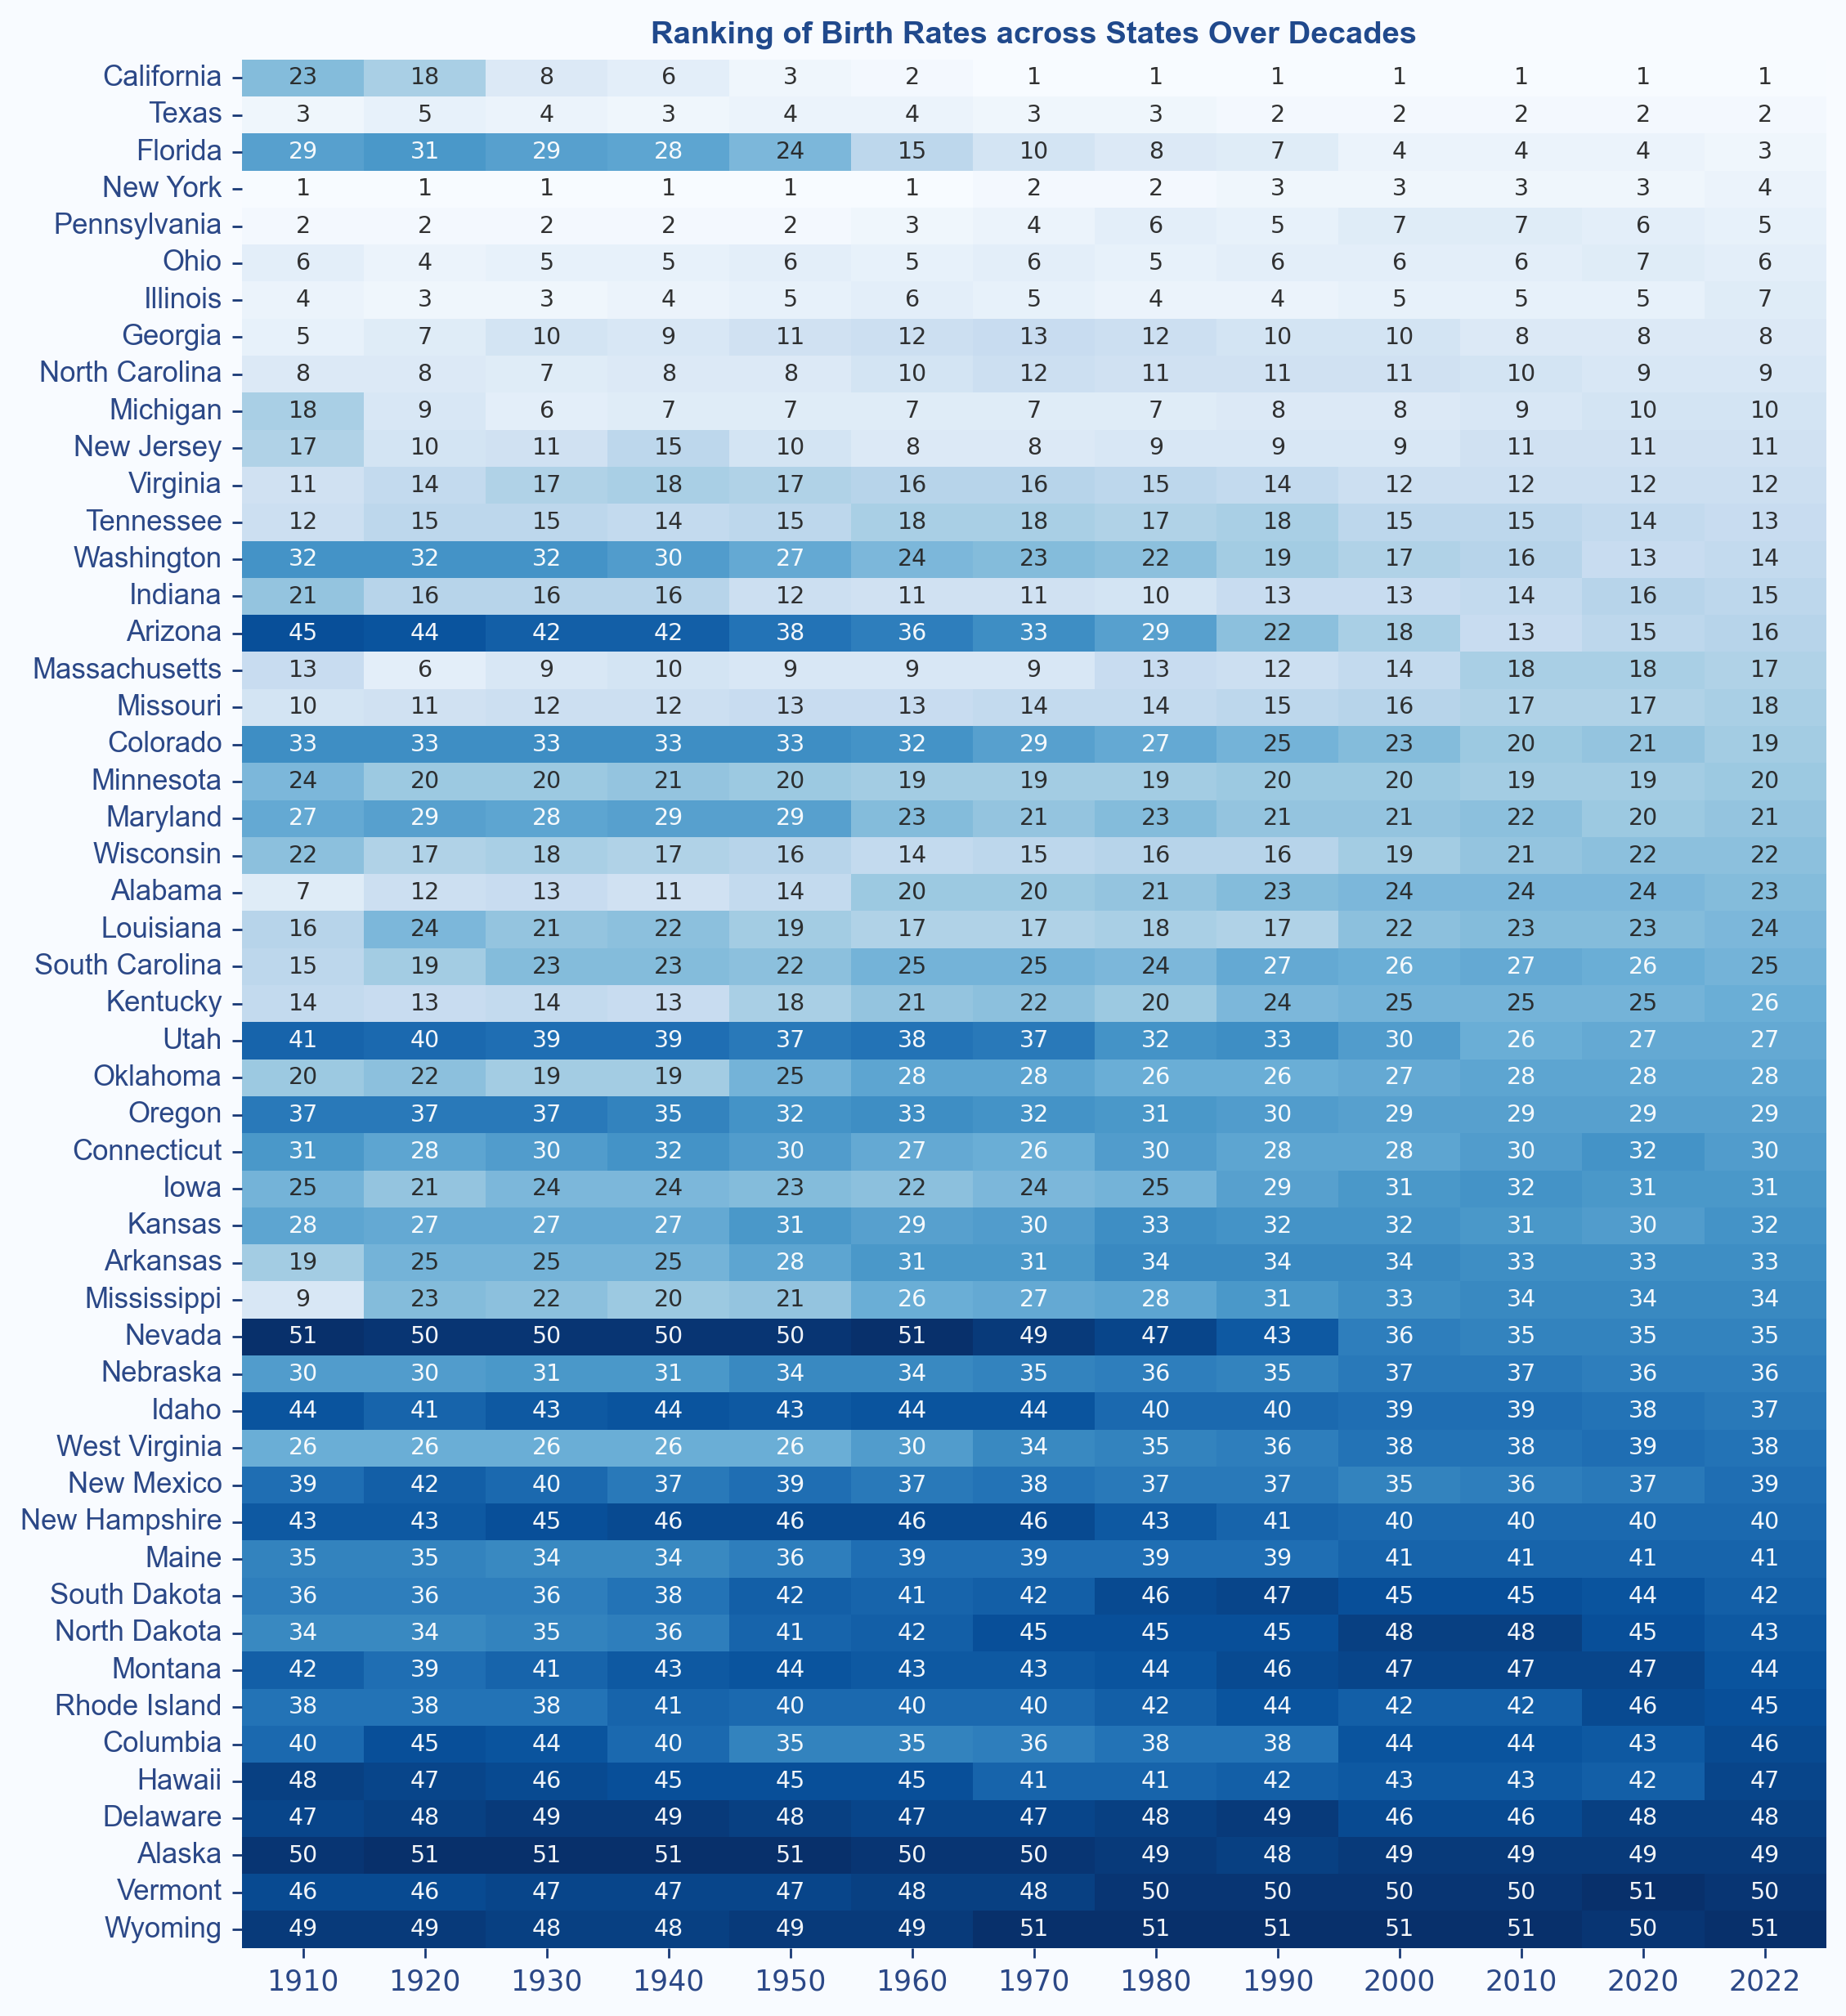

In [9]:
def transform_data(df):
    return (df.groupby(["State", pd.Grouper(key="Year", freq="10Y")]).Births.sum().unstack(0).rank(axis=1,ascending=False)
              .T.rename(lambda x: x.year, axis=1).sort_values(2030))

def plot_heatmap(ranked):
    fig, ax = plt.subplots(figsize=(10, 12), dpi=250, facecolor="#F8FBFF")
    sns.heatmap(ranked, annot=True, ax=ax, cbar=False, cmap="Blues", annot_kws={"alpha": 0.95, "size": 8.2})
    plt.title("Ranking of Birth Rates across States Over Decades",weight='bold',size=11,color='#20498C',fontname="Arial")
    ax.set_xticklabels(ax.get_xticklabels()[:-1] + ["2022"])
    ax.set(xlabel="", ylabel="",facecolor="none")
    ax.tick_params(colors='#193976', labelcolor='#2B4887')
    ax.set_yticklabels(ax.get_yticklabels(),fontname='Arial')
    return fig,ax

def create_plot(df):
    ranked = transform_data(df)
    fig,ax = plot_heatmap(ranked)
    return fig
    
create_plot(df);

## Birth Rate flactuations Throughout the Years

### Top 5

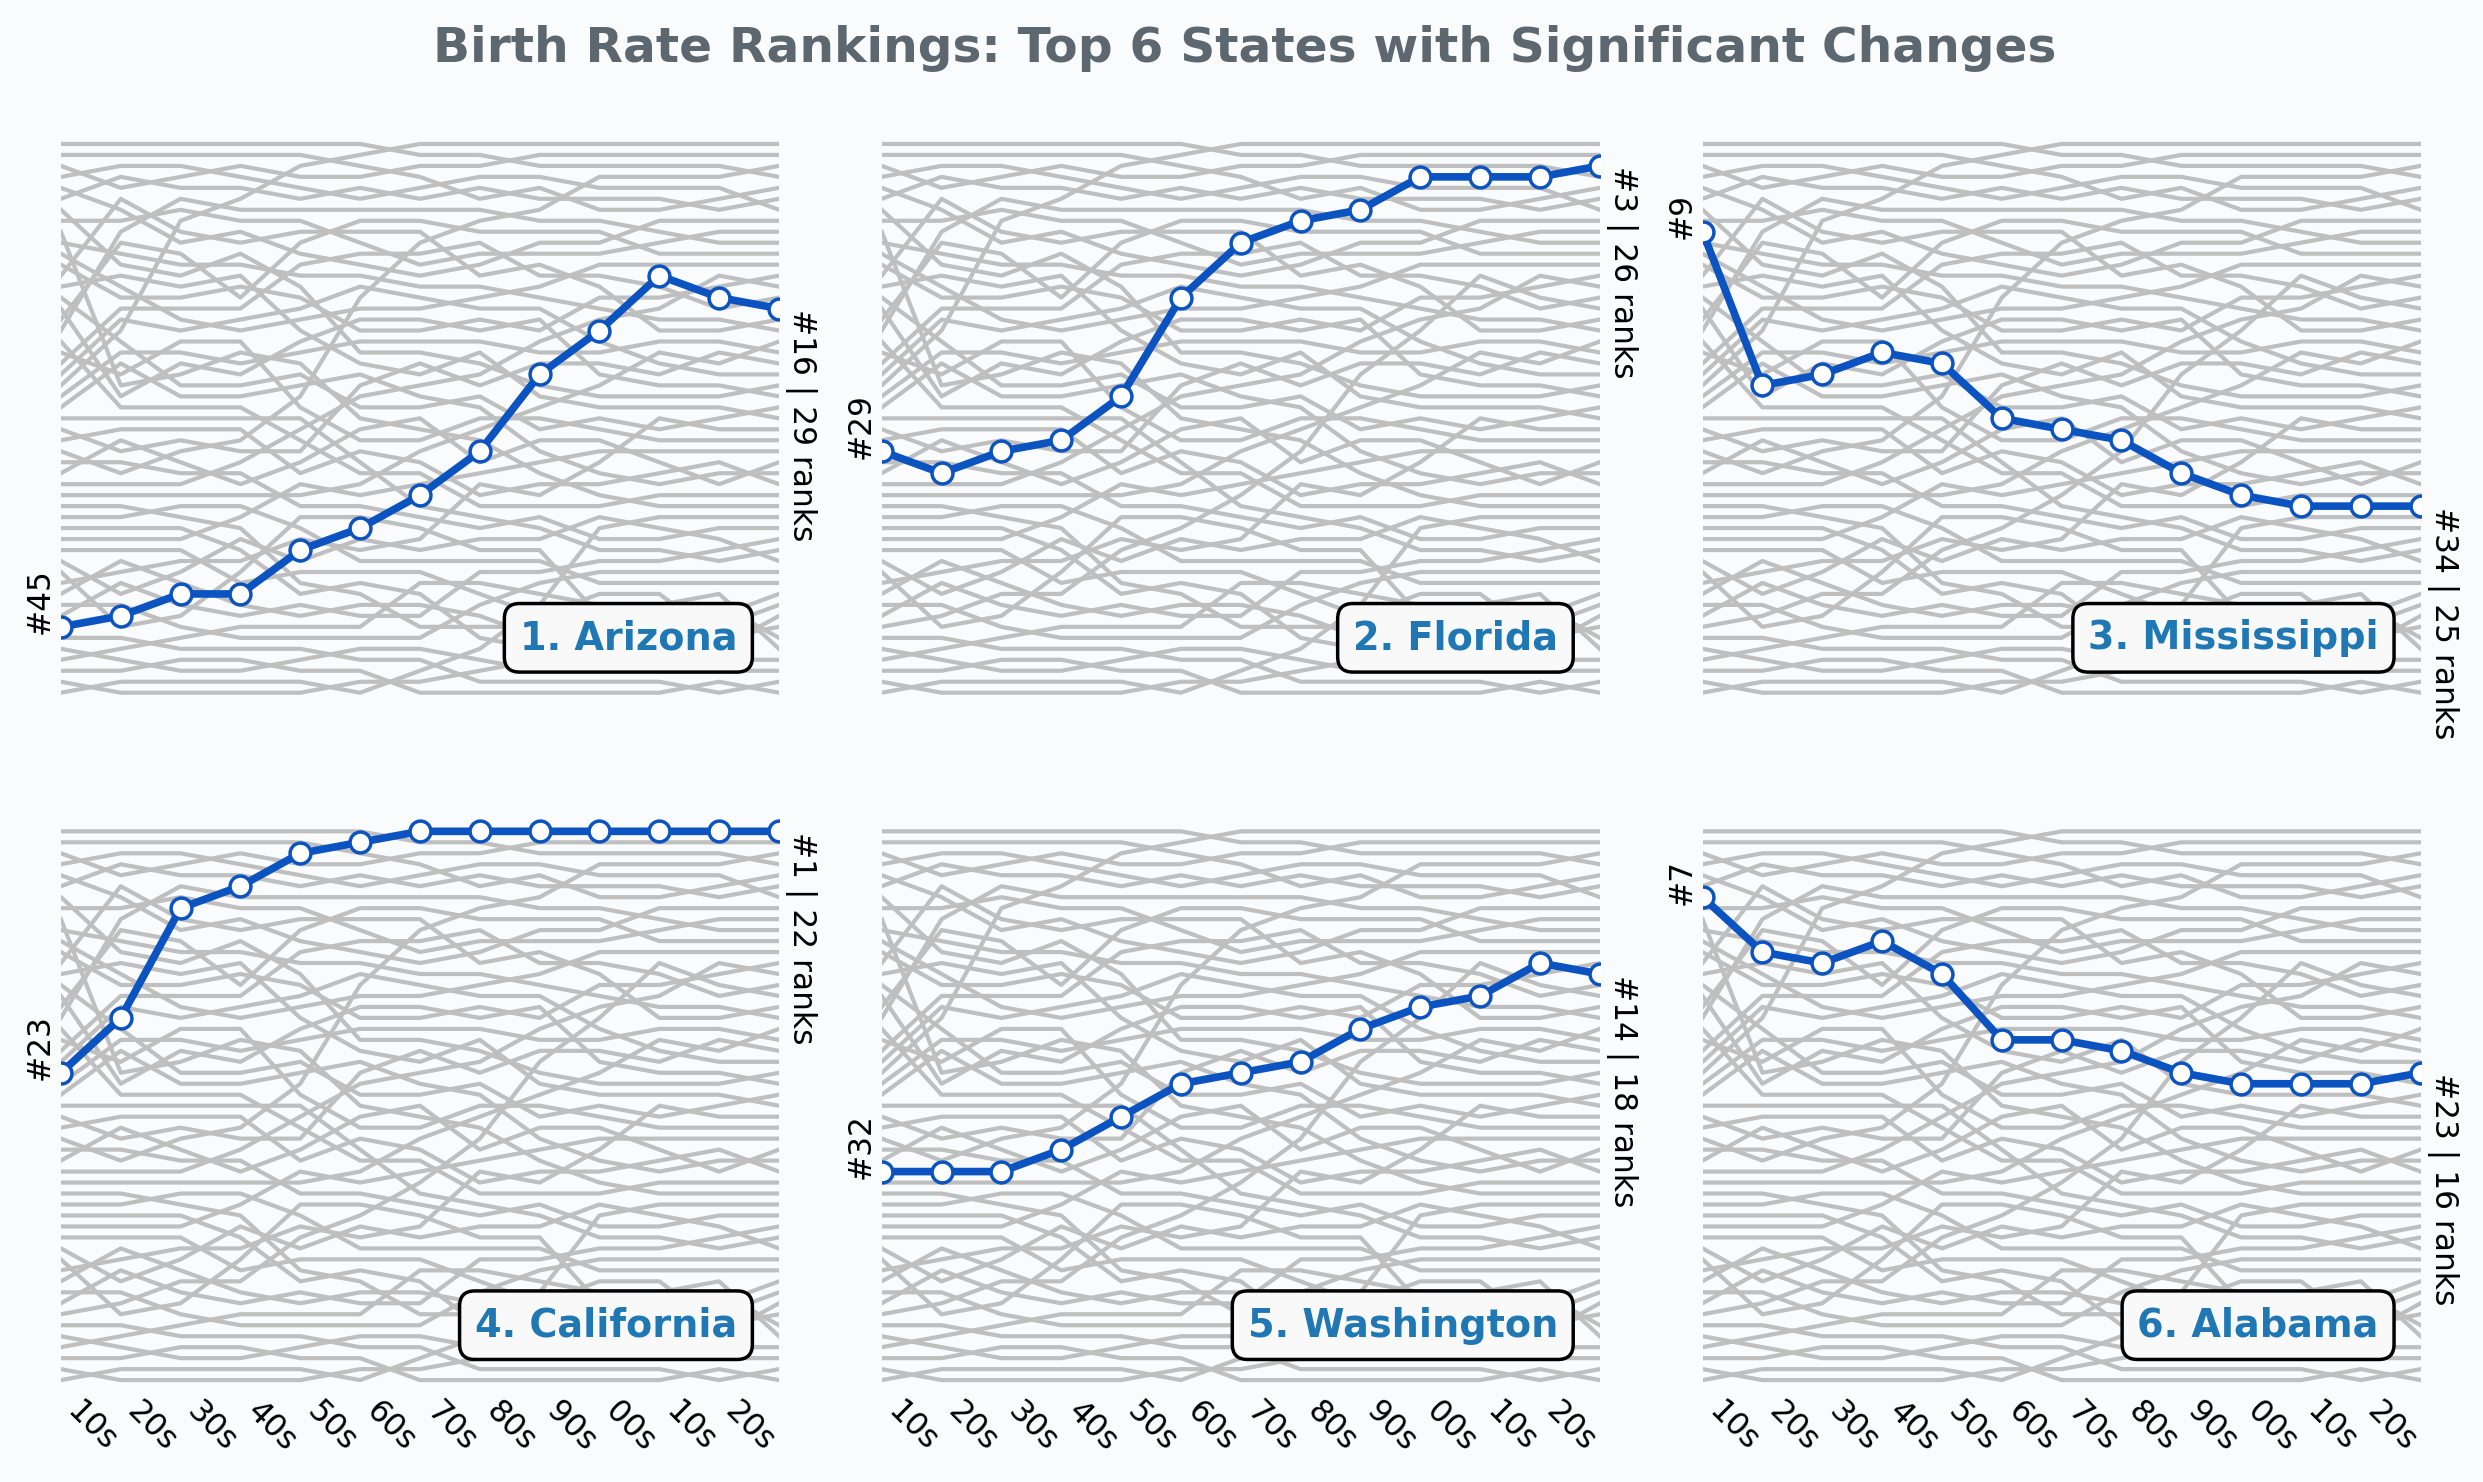

In [10]:
def transform_data(df,topN):
    ranks = df.groupby(["State", pd.Grouper(key="Year", freq="10Y")]).Births.sum().unstack(0).rank(axis=1)
    top_changes = (df.groupby(["State", pd.Grouper(key="Year", freq="10Y")]).Births.sum().unstack(0).rank(axis=1,ascending=False)
           .apply(lambda x: x[0]-x[-1]).abs().nlargest(topN))
    return ranks, top_changes

def plot_birth_rate_rankings(n, ranked, topN=6):
    fig, axes = plt.subplots(-(-topN//3), 3, sharex=True, sharey=True, figsize=(10, topN if topN>6 else 6 ),facecolor='#f9fbfc',dpi=250)
    fig.suptitle(f'Birth Rate Rankings: Top {topN} States with Significant Changes', fontsize=14,weight="bold",color='#5D676F')
    for i, (idx, data) in enumerate(n.items()):
        ax = axes.flatten()[i]
        ranked[idx].plot(ax=ax, label=idx, color='#0b53c1', xlabel="", marker='o',
                         markersize=6, markerfacecolor='white', zorder=60, linewidth=2.2)
        ranked.drop(idx, axis=1).plot(ax=ax, color='#BFBFBF', xlabel="", zorder=3, lw=1.2)

        ax.legend().remove()
        sns.despine(ax=ax)
        ax.set(yticks=[], xticks=list(range(-60, 65, 10)),facecolor="none",frame_on=False)
        ax.set_xticklabels(
            ["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "00s", "10s", "20s", ""],
            rotation=-45, ha='left', size=9
        )
        ax.tick_params(bottom=False, which='both', pad=-7, left=False)

        y1, y2 = ranked[idx].iloc[[0, -1]]
        ax.text(-66, y1, "#" + str(int(52 - y1)), rotation=90, size=9)
        ax.text(61, y2, "#" + str(int(52 - y2)) + f' | {int(data)} ranks', rotation=-90, va='top', size=9)
        ax.text(53, 5, str(i + 1) + ". " + idx, color="#1f77b4", ha='right', weight='bold',
                fontsize=11, bbox=dict(facecolor='#f9f9f9', edgecolor='black', boxstyle='round,pad=0.4'))
    fig.tight_layout()
    return fig, axes

def create_plot(df,topN=6):
    ranked,top=transform_data(df,topN)
    fig,ax=plot_birth_rate_rankings(top, ranked, topN)
    return fig, ax

create_plot(df);

## Overall Top 10 States with highest Births

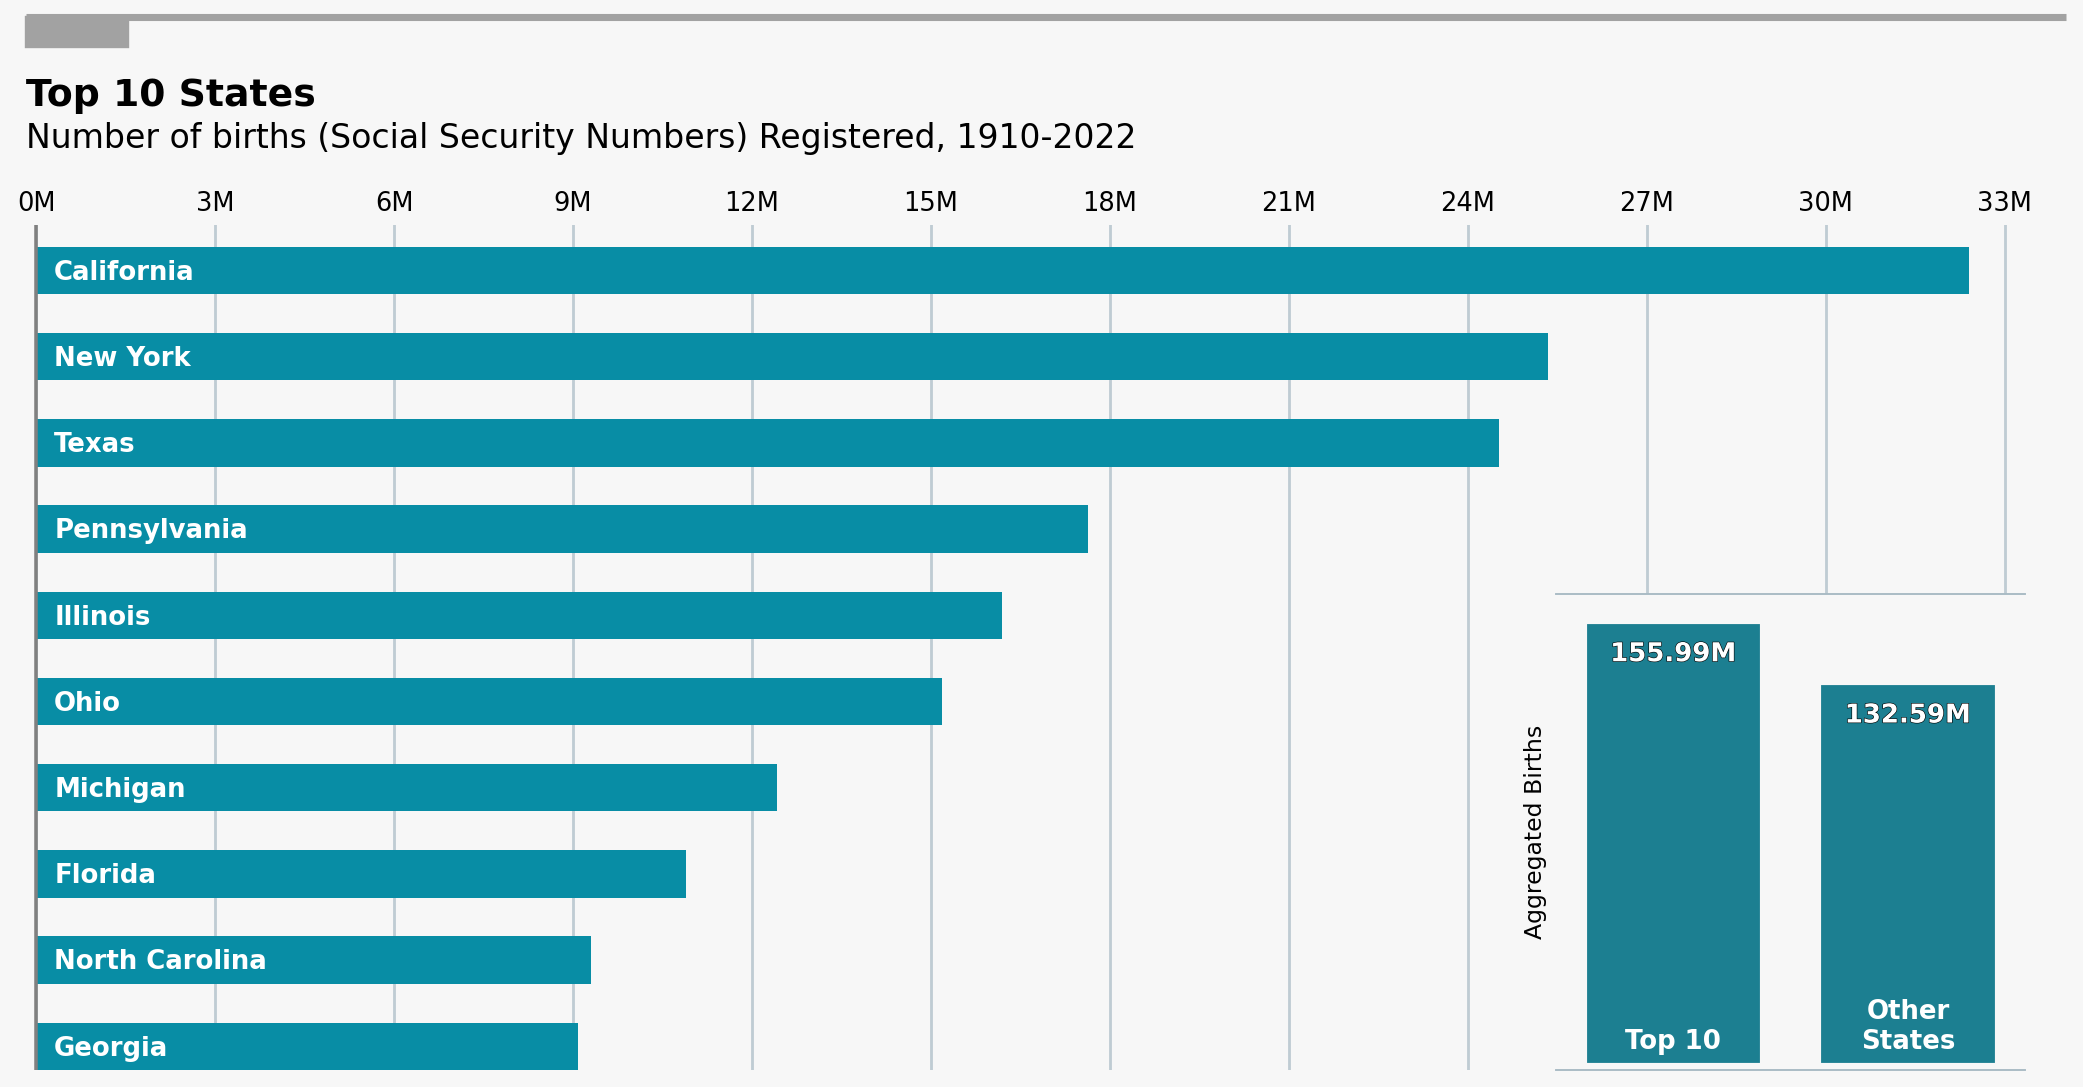

In [11]:
def transform_data(df, n=10):
    topN = df.groupby('State').Births.sum().nlargest(n).sort_values()
    aggregated = (df.groupby('State').Births.sum().to_frame().reset_index()
        .assign(State = lambda df:df.State.mask(df.State.isin(df.nlargest(n,"Births").State),f"Top {n}")
                .where(df.State.isin(df.nlargest(n,"Births").State),"Other\nStates")).groupby("State").sum()
        .sort_values("Births",ascending=False))
    return topN, aggregated

def plot_bar(data):
    BLUE, BLACK, GREY = "#076fa2", "#202020", "#a2a2a2"
    fig, ax = plt.subplots(figsize=(12, 7),facecolor='#F7F7F7',dpi=170)
    ax.barh(data.index, data, height=0.55, align="edge", color="#088da5");
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=12))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M'))
    ax.set(axisbelow=True, ylim=(0, len(data) - 0.2),facecolor='none')
    ax.grid(axis = "x", color="#A8BAC4", lw=1.2,alpha=0.7)
    sns.despine(ax=ax,bottom=True)
    ax.spines["left"].set(lw=1.5, capstyle="butt", color='grey')
    ax.tick_params(labeltop=True,labelbottom=False,length=0,labelsize=10.9)
    ax.yaxis.set_visible(False)

    # Add line and rectangle on top.
    fig.add_artist(lines.Line2D([0, 1], [0.985, 0.985], lw=3, color=GREY, solid_capstyle="butt"))
    fig.add_artist(patches.Rectangle((0, 0.96), 0.05, 0.025, color=GREY))

    for i, p in enumerate(ax.patches):
        plt.text(0 + 3e5, p.get_y() + 0.25, data.index[i], va="center", color="white", size=11, weight='bold')

    fig.text(0, 0.91, "Top 10 States", fontsize=16, fontweight="bold")

    fig.text(0, 0.875, "Number of births (Social Security Numbers) Registered, 1910-2022", fontsize=14)
    fig.subplots_adjust(left=0.005, right=1, top=0.81, bottom=0.1)
    return fig, ax
    
def plot_secondary_bar(data,fig):
    ax2=fig.add_axes([0.75,0.1,0.23,0.4])
    sns.barplot(data.T,color="#088da5",width=0.8,edgecolor="#F7F7F7",linewidth=6)
    # sns.despine(left=True,ax=ax2)
    ax2.spines["bottom"].set_color('grey')
    ax2.tick_params(left=False,bottom=False,labelbottom=False,labelleft=False)
    ax2.set(xlabel="", ylabel="Aggregated Births", facecolor="#F7F7F7")
    sns.despine(ax=ax2,top=False,left=True)
    ax2.spines[:].set_color("#A8BAC4")

    for i,patch in enumerate(ax2.patches):
        x= patch.get_width()/2 + patch.get_x()
        pad=8e6
        y=patch.get_height()-1.7e7
        path_effect=[withStroke(linewidth=0.5, foreground="black")]
        ax2.text(x,pad,data.index[i],color="white",ha="center",size=11,weight="bold")
        ax2.text(x,y,str(round(y/1e6,2))+"M",color="white",ha="center",size=11,path_effects=path_effect,weight="bold")
    
def create_plot(df):
    top10, aggregated = transform_data(df)
    fig,ax = plot_bar(top10)
    plot_secondary_bar(aggregated,fig)
    
create_plot(df)

# US Baby Names Analysis

In [12]:
# ax = df.groupby('Name').Births.sum().sort_values().nlargest(6).plot.bar(xlabel="",color=[cmap((j*30)) for j in range(6)],figsize=(9,6))
# sns.despine()
# plt.title("Most Popular Names in the last 110 Years",pad=20)
# plt.xticks(rotation=0)

# for bar in ax.patches:
#     plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5e5,str(round(bar.get_height()/1000000,2))+" Mil",ha="center")


0.007500000000000007


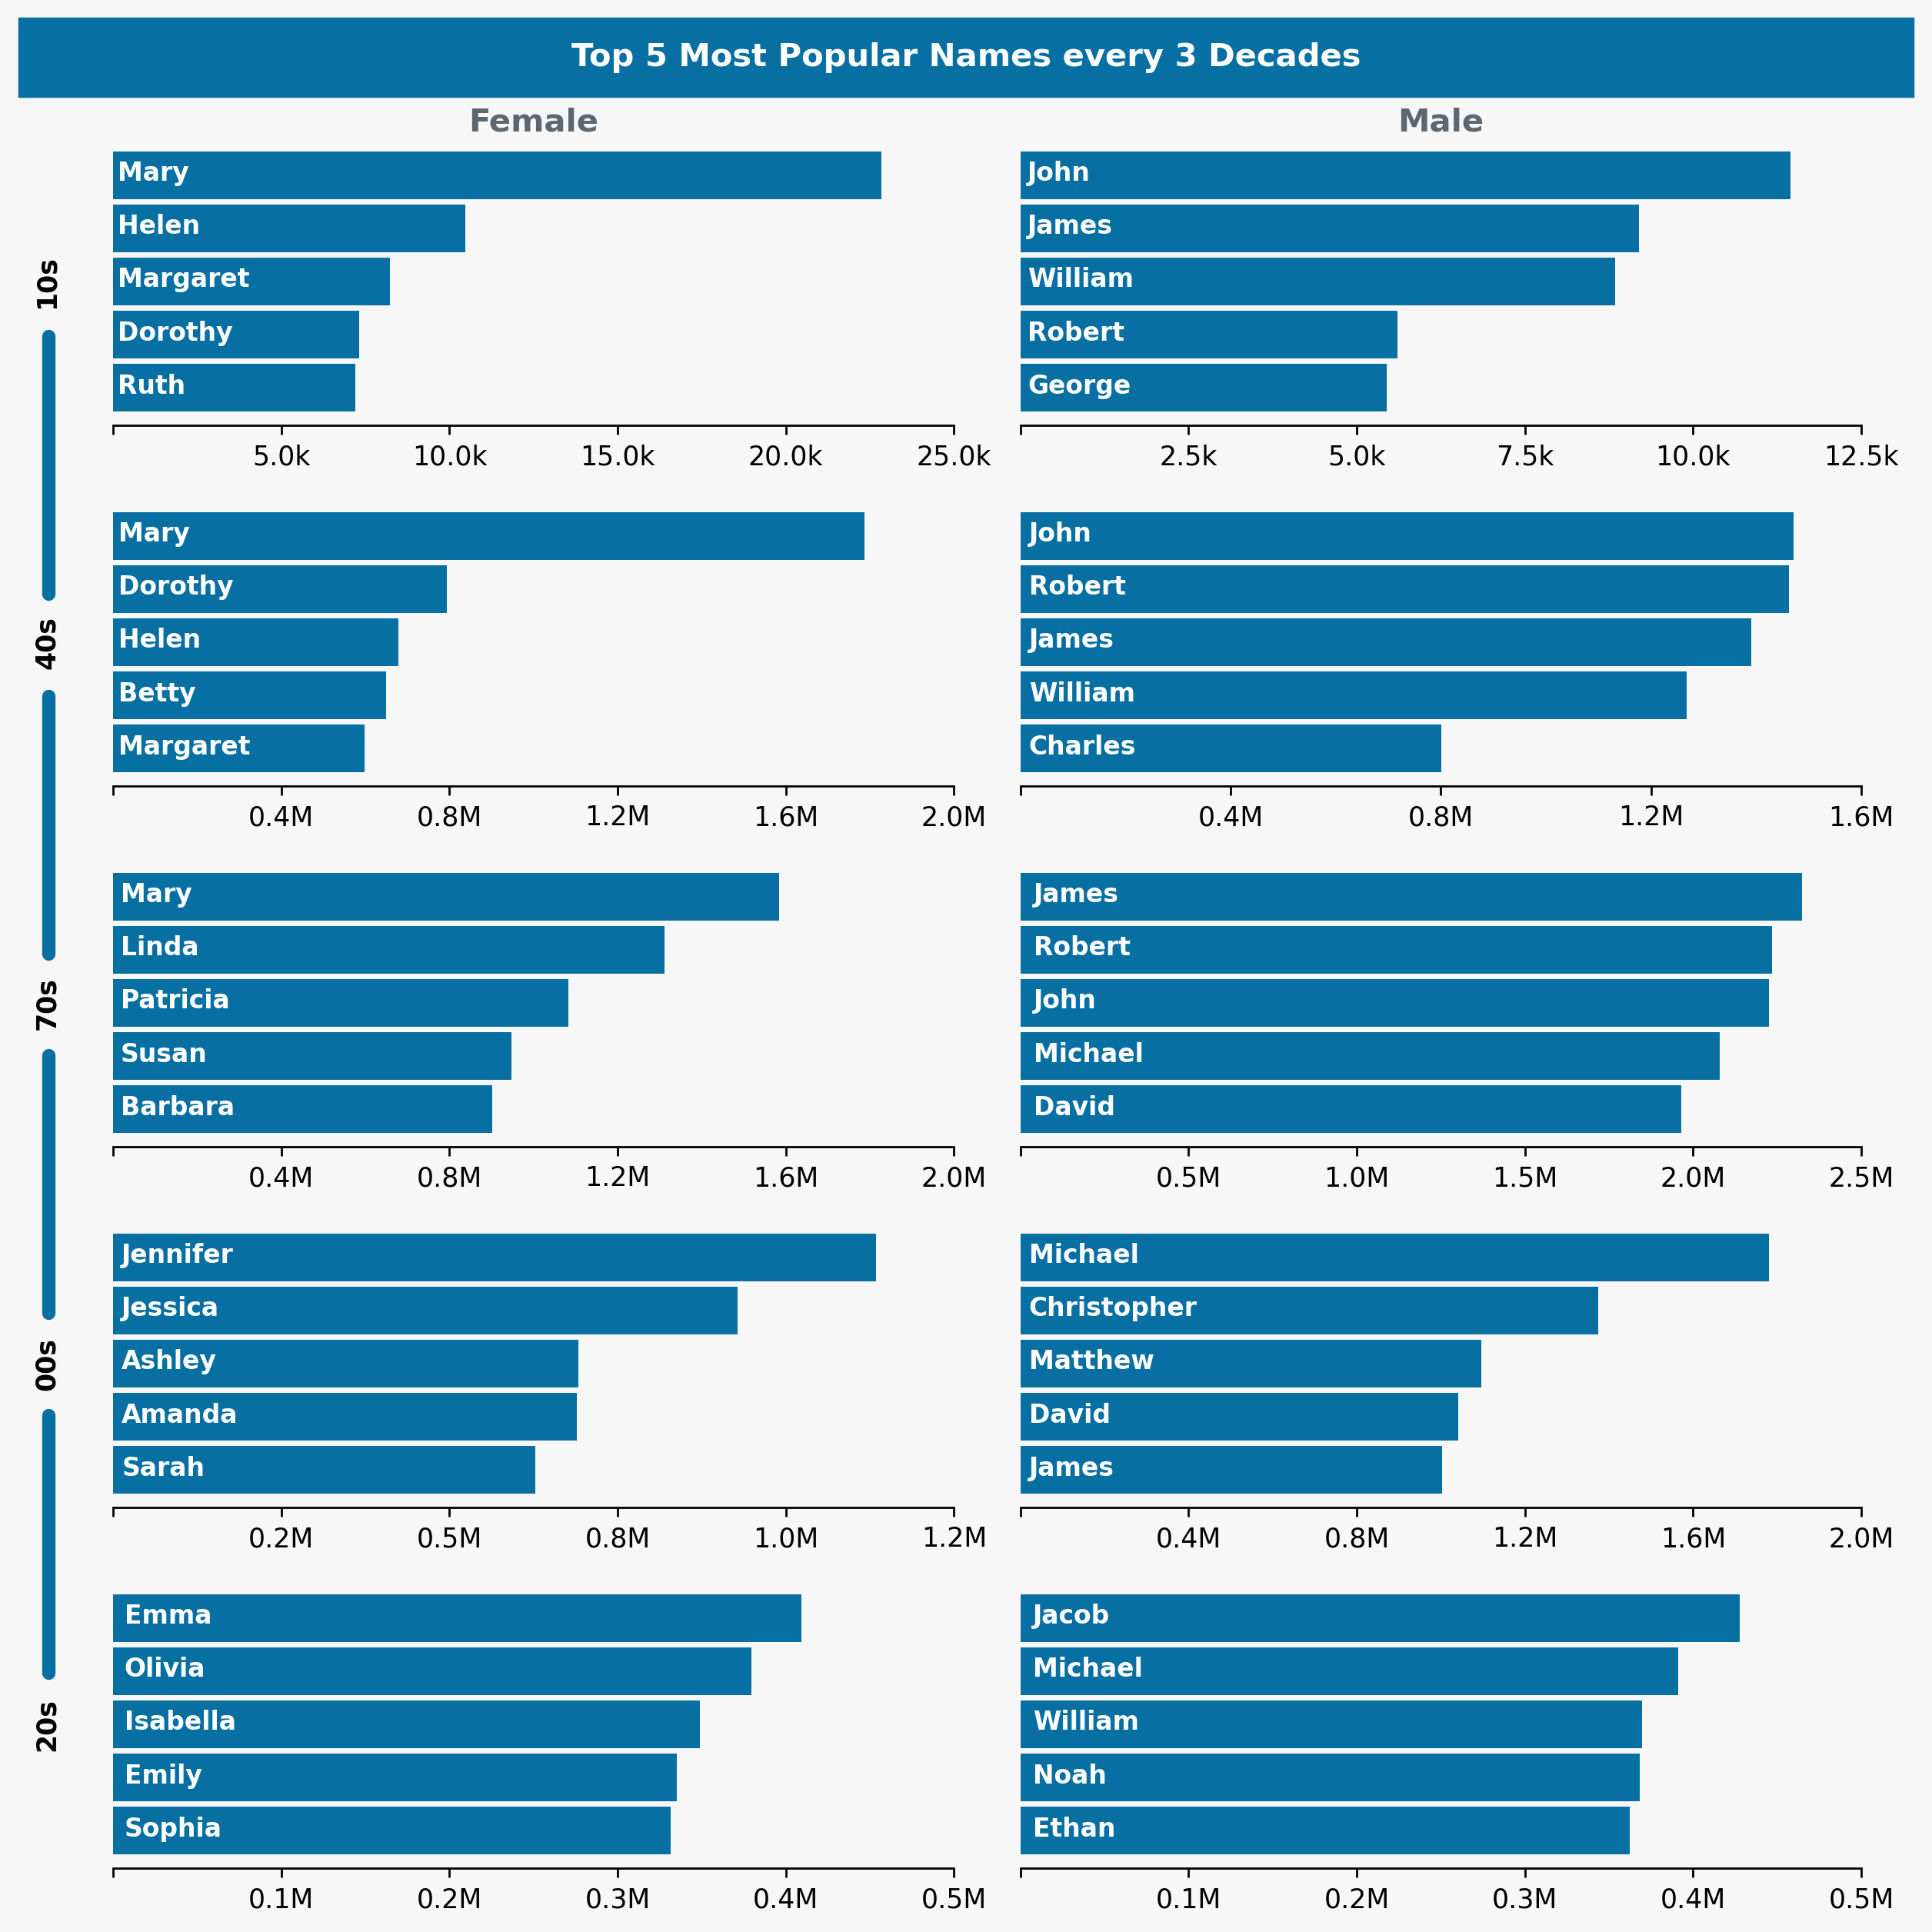

In [13]:
data=df.groupby([pd.Grouper(key="Year",freq="30Y"),"Gender","Name"]).Births.sum().unstack([0,1])

fig,axes = plt.subplots(5,2,figsize=(10,10),dpi=250,facecolor='#F7F7F7')
BLUE = "#076fa2"
for i, (ax, col) in enumerate(zip(axes.flatten(), data.columns)):
    data[col].nlargest(5).sort_values().plot.barh(ax=ax,color=BLUE,width=0.9)
    ax.set_facecolor("None")
    
    locator = ticker.MaxNLocator(nbins=5)
    ax.xaxis.set_major_locator(locator)
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M')
    if i in (0,1):
        formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000:.1f}k')
    
    ax.xaxis.set_major_formatter(formatter)
    
    
    if i%2==0 and i !=8:
        ax.set_ylabel(col[0].strftime("%Y")[-2:]+"s",weight='bold',labelpad=20)
    elif i==8:
        ax.set_ylabel("20s",weight='bold',labelpad=20)
    
    else:
        ax.set_ylabel("")
 
    if i==0:
        ax.set_title("Female",pad=0,weight=600,va="bottom",color='#5D676F')
       
    elif i==1:
        ax.set_title("Male",pad=0,weight=600,va="bottom",color='#5D676F')
    
    
        
    for j, p in enumerate(ax.patches):

        x = min([pp.get_width()*0.02 for pp in ax.patches])
        color = "white"
        y = p.get_y() 
        ax.text(x, y + 0.5 / 2,ax.get_yticklabels()[j].get_text(),va="bottom",color=color,size=9.5,weight='bold')
        
    ax.tick_params(left=False,labelleft=False)
    ax.set_xticks(ax.get_xticks(),[""]+ax.get_xticklabels()[1:]);
        
# Add the vertical line
# fig.subplots_adjust(wspace=0.25)
# fig.add_artist(plt.Line2D([0.5, 0.50], [1, 0.999], color='grey', linestyle='-',lw=80))
rect_width = 0.985
rect_height = 0.036
rect_x = 0.5 - rect_width / 2 
rect_y = 0.96
fig.add_artist(patches.Rectangle((rect_x, 0.96), rect_width, 0.04, color=BLUE,alpha=1,zorder=0))


print(rect_x)
length = 0.134
high= 0.835
dec = 0.053


for i in range(4):
    line_high = high - (i * length) - (i * dec)
    line = plt.Line2D([0.0226, 0.0226], [line_high, line_high - length], linestyle='-', lw=5,color=BLUE)
    line.set_solid_capstyle('round')
    fig.add_artist(line)
fig.suptitle("Top 5 Most Popular Names every 3 Decades",va="center",weight='bold',color='White')


sns.despine(left=True)
plt.tight_layout()

    


## Frequency of top 10 names

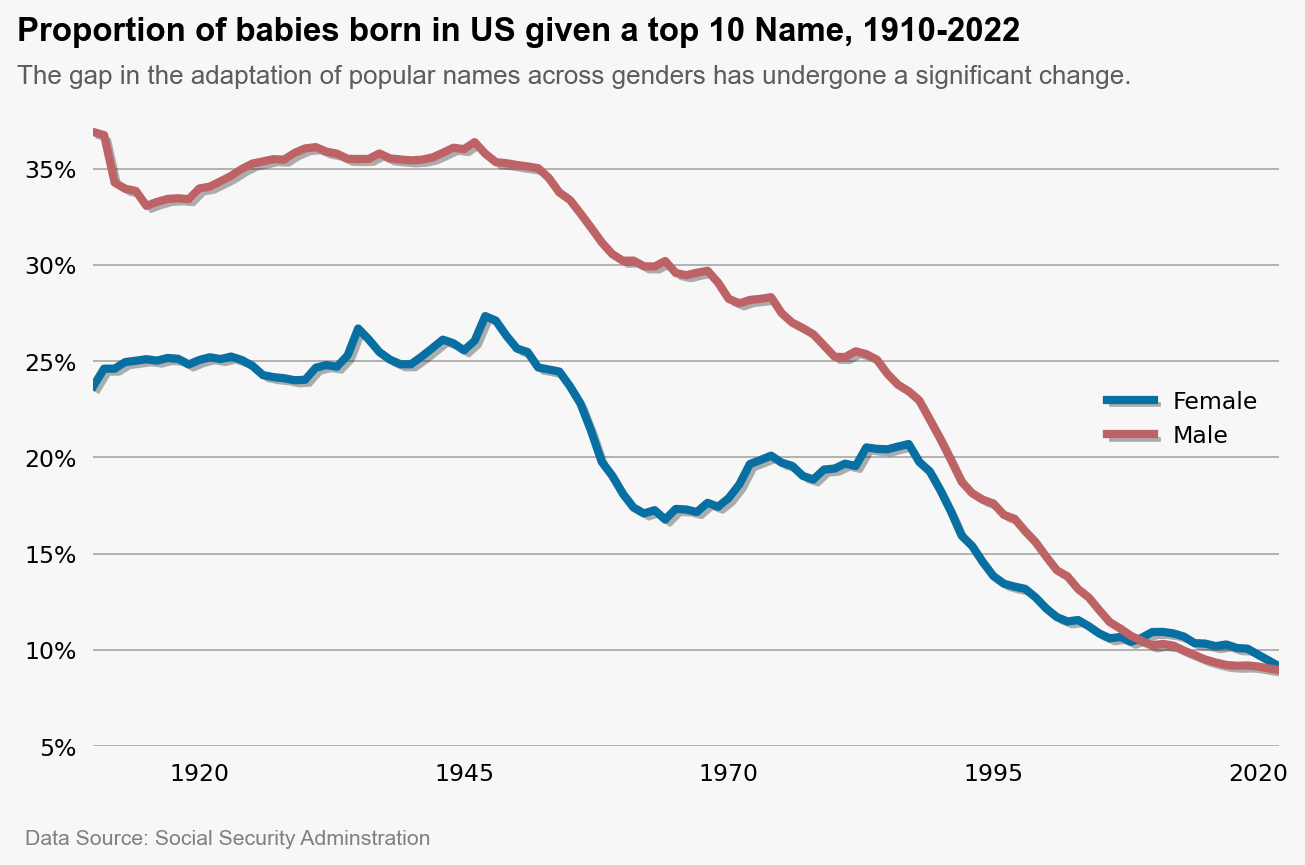

In [16]:
def transform_data(df):
    return (
    df.groupby(['Year', 'Gender', 'Name'])
    .Births.sum()
    .groupby(['Year', 'Gender'])
    .apply(lambda x: x.nlargest(10).sum())
    .div(df.groupby(['Year', 'Gender']).Births.sum())
    .unstack()
    )

def plot_line(df):
    GREEN, BLUE, RED  = "#2FC1D3", "#076FA1", "#BE6365"
    fig, ax = plt.subplots(figsize=(9, 5),facecolor="#F7F7F7",dpi=170)
    colors=[BLUE,RED]
    df.plot(ax=ax,lw=3.5,color=colors,xlabel="",
                     path_effects=[path_effects.SimpleLineShadow(shadow_color='black', linewidth=2),path_effects.Normal()])
    ax.grid(axis="y")
    ax.set_facecolor("None")
    ax.spines[:].set_visible(False)
    ax.tick_params(which='both',left=False,bottom=False)
    ax.set_ylim(0.05,0.39)

    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=7))

    # Set the major y tick formatter to display percentages
    def percent_formatter(x, pos):
        return '{:.0%}'.format(x)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
    ax.legend(labels=["Female","Male"],loc=5,frameon=False)
    return fig, ax

def annotate_plot(fig):
    fig.text(0.075, 0.94, "Proportion of babies born in US given a top 10 Name, 1910-2022", fontsize=14, fontweight="bold",ha='left',fontname="Arial")
    fig.text(0.075, 0.89, "The gap in the adaptation of popular names across genders has undergone a significant change.", fontsize=11,ha='left',color="#5C5B5D",fontname="Arial")

    fig.text(0.08, -0.01, "Data Source: Social Security Adminstration",fontname="Arial",
            ha='left', va='bottom', fontsize=9, color='grey')

def create_plot(df):
    data = transform_data(df)
    fig,ax = plot_line(data)
    annotate_plot(fig)
create_plot(df)

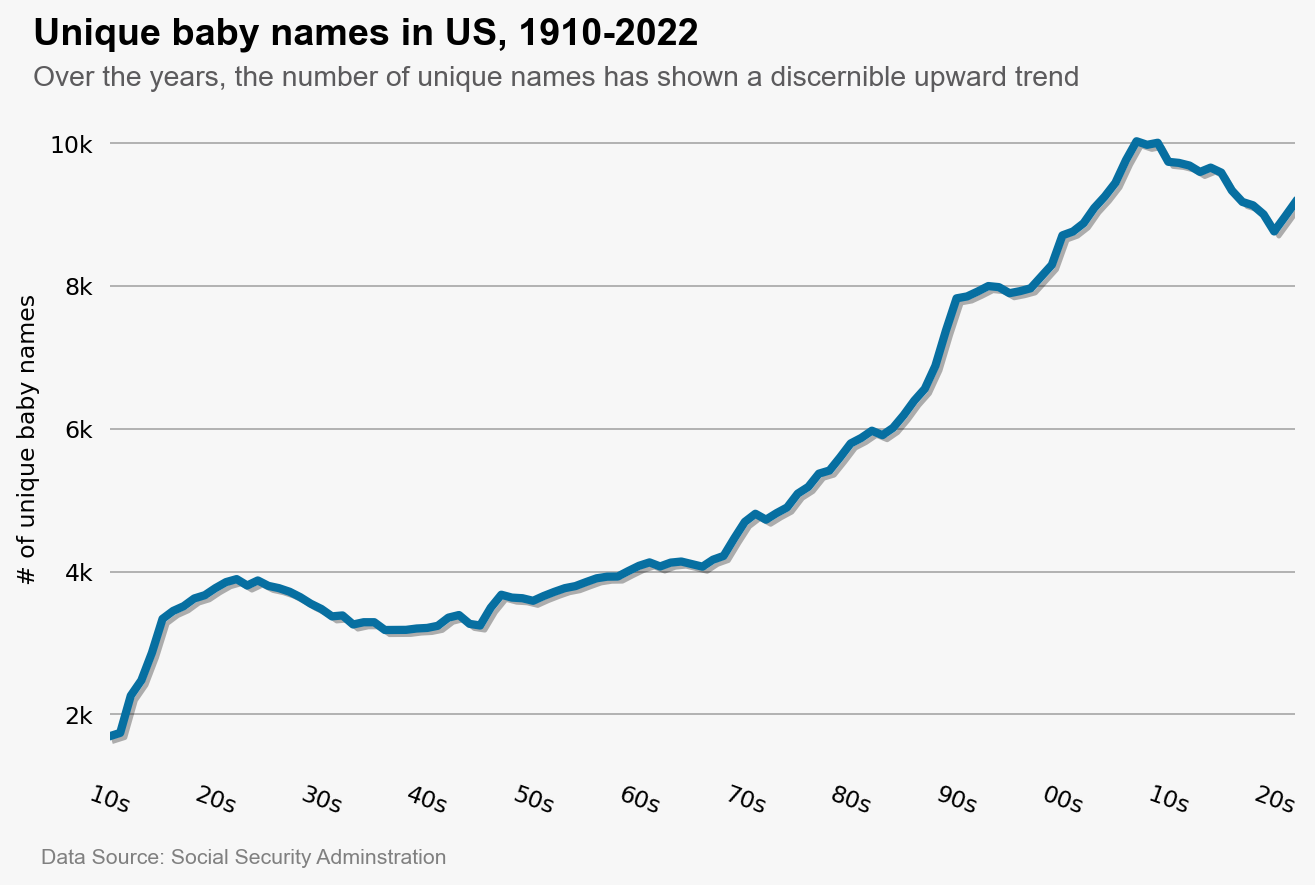

In [17]:


def transform_data(df):
    return (df.groupby(["Year"]).Name.nunique())

def plot_unique_names(data):
    BLUE = "#076FA1"
    GREY_DARKER = "#333333"
    fig, ax = plt.subplots(figsize=(9, 5), facecolor="#F7F7F7", dpi=170)
    colors = BLUE

    data.plot(ax=ax, color=BLUE, lw=3.5, xlabel="", ylabel="# of unique baby names",
                                             path_effects=[path_effects.SimpleLineShadow(shadow_color='black', linewidth=2),
                                                           path_effects.Normal()])
    ax.grid(axis="y")
    ax.set_facecolor("None")
    ax.spines[:].set_visible(False)
    ax.tick_params(which='both', left=False, bottom=False)
    ax.set_xticks(range(-60,60,10),
                  ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s'],rotation=-20)
    ax.set_yticks(ax.get_yticks()[1:-1],
                  [str(int(label.get_text())//1000)+"k" for label in ax.get_yticklabels()[1:-1]])

    return fig, ax

def annonate_plot(fig):
    fig.text(0.075, 0.96, "Unique baby names in US, 1910-2022", fontsize=16, fontweight="bold", ha='left',
             fontname="Arial")
    fig.text(0.075, 0.91, "Over the years, the number of unique names has shown a discernible upward trend",
             fontsize=12, ha='left', color="#5C5B5D", fontname="Arial")
    fig.text(0.08, -0.01, "Data Source: Social Security Adminstration",fontname="Arial",
        ha='left', va='bottom', fontsize=9, color='grey')


# Example usage:
def create_plot(df):
    data=transform_data(df)
    fig, ax = plot_unique_names(data)
    annonate_plot(fig)
    
    
create_plot(df)

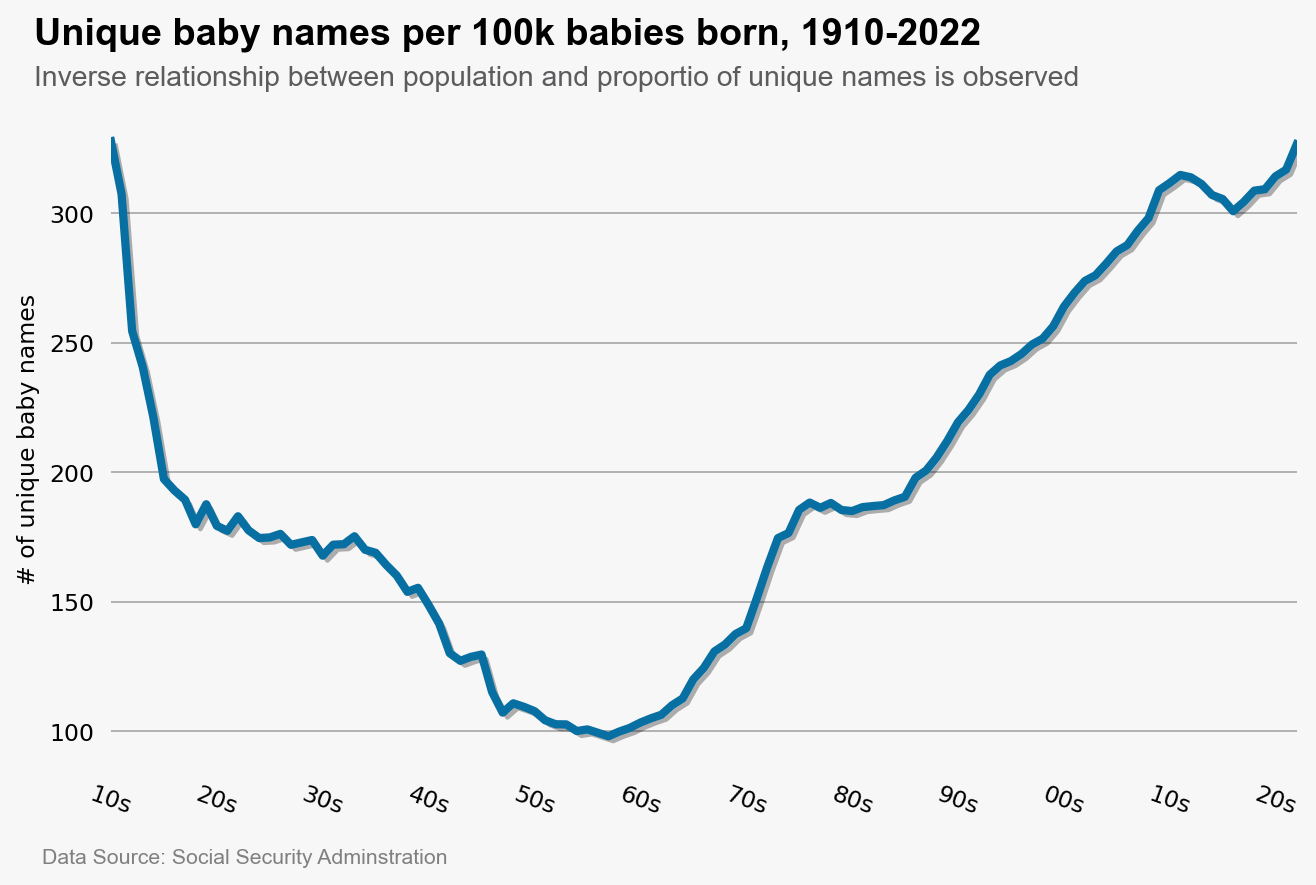

In [20]:


def transform_data(df):
    return (df.groupby("Year").Name.nunique() / df.groupby("Year").Births.sum()).mul(100000)

def plot_unique_names(data):
    BLUE, GREY_DARKER = "#076FA1", "#333333"
    fig, ax = plt.subplots(figsize=(9, 5), facecolor="#F7F7F7", dpi=170)
    data.plot(ax=ax, color=BLUE, lw=3.5, xlabel="", ylabel="# of unique baby names",
                                             path_effects=[path_effects.SimpleLineShadow(shadow_color='black', linewidth=2),
                                                           path_effects.Normal()])
    ax.grid(axis="y")
    ax.set_facecolor("None")
    ax.spines[:].set_visible(False)
    ax.tick_params(which='both', left=False, bottom=False)
    ax.set_xticks(range(-60,60,10),
                  ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s'],rotation=-20)
#     ax.set_yticks(ax.get_yticks()[1:-1],
#                   [str(int(label.get_text())/1000)+"k" for label in ax.get_yticklabels()[1:-1]])

    return fig, ax

def annonate_plot(fig):
    fig.text(0.075, 0.96, "Unique baby names per 100k babies born, 1910-2022", fontsize=16, fontweight="bold", ha='left',
             fontname="Arial")
    fig.text(0.075, 0.91, "Inverse relationship between population and proportio of unique names is observed",
             fontsize=12, ha='left', color="#5C5B5D", fontname="Arial")
    fig.text(0.08, -0.01, "Data Source: Social Security Adminstration",fontname="Arial",
        ha='left', va='bottom', fontsize=9, color='grey')

def create_plot(df):
    data=transform_data(df)
    fig, ax = plot_unique_names(data)
    annonate_plot(fig)
    
    
create_plot(df)